In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import joblib
import xgboost as xgb

In [2]:
SEED=12345

In [3]:
from rmltk import explain, model # simple module for explaining and training models

# h2o Python API with specific classes
import h2o                                        
from h2o.estimators.gbm import H2OGradientBoostingEstimator # for GBM

import numpy as np                # array, vector, matrix calculations
import pandas as pd               # DataFrame handling

import matplotlib.pyplot as plt # general plotting
pd.options.display.max_columns = 999 # enable display of all columns in notebook

# enables display of images in notebook
from IPython.display import Image
from IPython.display import display

# display plots in-notebook
%matplotlib inline   

h2o.init(max_mem_size='4G')      # start h2o
h2o.remove_all()                 # remove any existing data structures from h2o memory
h2o.no_progress()                # turn off h2o progress indicators  

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.1" 2018-10-16 LTS; OpenJDK Runtime Environment Zulu11.2+3 (build 11.0.1+13-LTS); OpenJDK 64-Bit Server VM Zulu11.2+3 (build 11.0.1+13-LTS, mixed mode)
  Starting server from /Users/xinyuyan/opt/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/4l/8_03z6p95c18193526fk_8br0000gn/T/tmp_6g8sf4t
  JVM stdout: /var/folders/4l/8_03z6p95c18193526fk_8br0000gn/T/tmp_6g8sf4t/h2o_xinyuyan_started_from_python.out
  JVM stderr: /var/folders/4l/8_03z6p95c18193526fk_8br0000gn/T/tmp_6g8sf4t/h2o_xinyuyan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,10 months and 2 days !!!
H2O cluster name:,H2O_from_python_xinyuyan_hy0hq2
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [4]:
df = pd.read_pickle('data.pkl')

In [5]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,revenue,sold_lag_1,sold_lag_2,sold_lag_3,sold_lag_6,sold_lag_12,sold_lag_24,sold_lag_36,iteam_sold_avg,state_sold_avg,store_sold_avg,cat_sold_avg,dept_sold_avg,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend
1067150,14370,1437,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.217041,1.218750,1.307617,0.562500,0.697754,0.697754,0.322266,0.217041,0.217041,1.307617,0.803711,1.022461,0.0,0.000000,-0.322266
1067151,14380,1438,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.260498,1.218750,1.307617,0.562500,0.697754,0.697754,0.254639,0.260498,0.260498,1.307617,0.803711,1.022461,0.0,0.000000,-0.254639
1067152,14390,1439,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.076904,1.218750,1.307617,0.562500,0.697754,0.697754,0.157349,0.076904,0.076904,1.307617,0.803711,1.022461,0.0,0.000000,-0.157349
1067153,14400,1440,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,4.339844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.017578,1.218750,1.307617,0.562500,0.697754,0.697754,1.699219,2.017578,2.017578,1.307617,0.803711,1.022461,0.0,0.000000,-1.699219
1067154,14410,1441,3,1,0,0,36,0,11106,2,1,3,2011,-1,-1,-1,-1,1,1,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.757324,1.218750,1.307617,0.562500,0.697754,0.697754,0.961426,0.757324,0.757324,1.307617,0.803711,1.022461,0.0,0.000000,-0.961426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60034805,14329,1432,2,0,9,2,1969,0,11621,3,2,6,2016,16,3,2,0,0,0,0,2.980469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799805,1.030273,1.092773,1.626953,2.037109,2.037109,0.529297,0.799805,0.799805,1.092773,1.706055,2.214844,0.0,0.529297,-0.529297
60034806,14339,1433,2,0,9,2,1969,0,11621,3,2,6,2016,16,3,2,0,0,0,0,2.480469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.431396,1.030273,1.092773,1.626953,2.037109,2.037109,0.370605,0.431396,0.431396,1.092773,1.706055,2.214844,0.0,0.370605,-0.370605
60034807,14349,1434,2,0,9,2,1969,0,11621,3,2,6,2016,16,3,2,0,0,0,0,3.980469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706055,1.030273,1.092773,1.626953,2.037109,2.037109,0.882812,0.706055,0.706055,1.092773,1.706055,2.214844,0.0,0.882812,-0.882812
60034808,14359,1435,2,0,9,2,1969,0,11621,3,2,6,2016,16,3,2,0,0,0,0,1.280273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.638672,1.030273,1.092773,1.626953,2.037109,2.037109,0.376221,0.638672,0.638672,1.092773,1.706055,2.214844,0.0,0.376221,-0.376221


In [6]:
data=df

In [7]:
CA1=df[df['store_id']==0]

In [8]:
y_name = 'sold'
x_names = [name for name in CA1.columns if name not in [y_name,]]
print('y =', y_name)
print('X =', x_names)

y = sold
X = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'revenue', 'sold_lag_1', 'sold_lag_2', 'sold_lag_3', 'sold_lag_6', 'sold_lag_12', 'sold_lag_24', 'sold_lag_36', 'iteam_sold_avg', 'state_sold_avg', 'store_sold_avg', 'cat_sold_avg', 'dept_sold_avg', 'cat_dept_sold_avg', 'store_item_sold_avg', 'cat_item_sold_avg', 'dept_item_sold_avg', 'state_store_sold_avg', 'state_store_cat_sold_avg', 'store_cat_dept_sold_avg', 'rolling_sold_mean', 'expanding_sold_mean', 'selling_trend']


In [12]:
### Pair-wise Pearson Correlations for 'sold'

In [11]:
corr = pd.DataFrame(data[x_names + [y_name]].corr()[y_name]).iloc[:-1]
corr.columns = ['Pearson Correlation Coefficient']
corr

,Pearson Correlation Coefficient
id,-0.090321
item_id,-0.090314
dept_id,-0.094736
cat_id,-0.109880
store_id,-0.021448
state_id,-0.020972
d,0.025269
wm_yr_wk,0.025474
weekday,-0.017352
wday,-0.027959


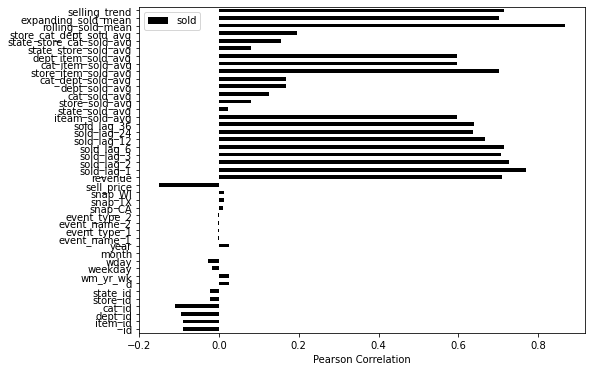

In [13]:
fig, ax_ = plt.subplots(figsize=(8, 6))
_ = pd.DataFrame(data[x_names + [y_name]].corr()[y_name]).iloc[:-1].plot(kind='barh', ax=ax_, colormap='gnuplot')
_ = ax_.set_xlabel('Pearson Correlation')

#### Rolling sold mean and sold lags are some top factors that influence the output variable. Data Poisoning of those factors does more demange to the models.  

#### Below, the adversary will poison a very small number of training data rows, which causes the model trained on the poisoned data to generate an less accurate prediction about the sell of an item in the store1 in CA

In [16]:
#CA1.loc[CA1['sold'] > 0] = 1
#CA1.info()

In [9]:
train = CA1[CA1['d']<=1914]
valid = CA1[(CA1['d']>=1914) & (CA1['d']<1942)]

# summarize split
print('Train data rows = %d, columns = %d' % (train.shape[0], train.shape[1]))
print('Validation data rows = %d, columns = %d' % (valid.shape[0], valid.shape[1]))

Train data rows = 5713826, columns = 44
Validation data rows = 85372, columns = 44


In [10]:
htrain = h2o.H2OFrame(train)
htrain[y_name] = htrain[y_name].asfactor()

In [11]:
hvalid = h2o.H2OFrame(valid)
hvalid[y_name] = hvalid[y_name].asfactor()

In [32]:
normal_gbm=model.gbm_grid(x_names, y_name, htrain, hvalid, SEED)

In [33]:
filename = 'normal_gbm_model'
joblib.dump(normal_gbm,filename)

In [34]:
np.random.seed(SEED) # same results for each run of the cell

In [18]:
ids = np.random.choice(CA1[(CA1['rolling_sold_mean'] == 1) & (CA1['sell_price'] == 4) & (CA1['sold'] == 1)].index,8)

In [19]:
print(ids)

[ 4391882 14941520  3539886 14545150 16618470 14941520  4391882  3539886]


In [20]:
# simple function for poisoning the selected rows
def poison(ids_):
    
    for i in ids_:
        
        CA1.loc[i, 'rolling_sold_mean'] = 2
        CA1.loc[i, 'sold'] = 2 # update target - this is the key! 
        
poison(ids)

/Users/xinyuyan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
poisoned = CA1.loc[ids, :] # reinsert poisoned data into training data
poisoned # display poisoned data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,revenue,sold_lag_1,sold_lag_2,sold_lag_3,sold_lag_6,sold_lag_12,sold_lag_24,sold_lag_36,iteam_sold_avg,state_sold_avg,store_sold_avg,cat_sold_avg,dept_sold_avg,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend
4391882,27590,2759,6,2,0,0,145,2,11121,6,5,6,2011,-1,-1,-1,-1,0,0,0,4.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.106506,1.21875,1.307617,0.717773,0.300781,0.300781,0.129883,0.106506,0.106506,1.307617,0.714355,0.343262,2.0,0.227539,0.870117
14941520,28570,2857,6,2,0,0,491,2,11219,2,1,6,2012,-1,-1,-1,-1,1,0,1,4.0,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.513672,1.21875,1.307617,0.717773,0.300781,0.300781,0.543457,0.513672,0.513672,1.307617,0.714355,0.343262,2.0,0.444824,0.456543
3539886,14340,1434,2,0,0,0,117,2,11117,6,5,5,2011,-1,-1,-1,-1,0,0,0,4.0,4.0,0.0,0.0,1.0,2.0,1.0,3.0,2.0,0.706055,1.21875,1.307617,1.626953,2.037109,2.037109,0.950195,0.706055,0.706055,1.307617,1.938477,2.470703,2.0,1.017578,0.049805
14545150,28570,2857,6,2,0,0,478,2,11217,3,2,5,2012,-1,-1,-1,-1,0,0,0,4.0,4.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.513672,1.21875,1.307617,0.717773,0.300781,0.300781,0.543457,0.513672,0.513672,1.307617,0.714355,0.343262,2.0,0.438232,0.456543
16618470,28570,2857,6,2,0,0,546,2,11226,0,7,7,2012,-1,-1,-1,-1,0,0,0,4.0,4.0,1.0,0.0,2.0,0.0,2.0,4.0,0.0,0.513672,1.21875,1.307617,0.717773,0.300781,0.300781,0.543457,0.513672,0.513672,1.307617,0.714355,0.343262,2.0,0.477051,0.456543
14941520,28570,2857,6,2,0,0,491,2,11219,2,1,6,2012,-1,-1,-1,-1,1,0,1,4.0,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.513672,1.21875,1.307617,0.717773,0.300781,0.300781,0.543457,0.513672,0.513672,1.307617,0.714355,0.343262,2.0,0.444824,0.456543
4391882,27590,2759,6,2,0,0,145,2,11121,6,5,6,2011,-1,-1,-1,-1,0,0,0,4.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.106506,1.21875,1.307617,0.717773,0.300781,0.300781,0.129883,0.106506,0.106506,1.307617,0.714355,0.343262,2.0,0.227539,0.870117
3539886,14340,1434,2,0,0,0,117,2,11117,6,5,5,2011,-1,-1,-1,-1,0,0,0,4.0,4.0,0.0,0.0,1.0,2.0,1.0,3.0,2.0,0.706055,1.21875,1.307617,1.626953,2.037109,2.037109,0.950195,0.706055,0.706055,1.307617,1.938477,2.470703,2.0,1.017578,0.049805


In [22]:
poisoned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 4391882 to 3539886
Data columns (total 44 columns):
id                          8 non-null int16
item_id                     8 non-null int16
dept_id                     8 non-null int8
cat_id                      8 non-null int8
store_id                    8 non-null int8
state_id                    8 non-null int8
d                           8 non-null int16
sold                        8 non-null int16
wm_yr_wk                    8 non-null int16
weekday                     8 non-null int8
wday                        8 non-null int8
month                       8 non-null int8
year                        8 non-null int16
event_name_1                8 non-null int8
event_type_1                8 non-null int8
event_name_2                8 non-null int8
event_type_2                8 non-null int8
snap_CA                     8 non-null int8
snap_TX                     8 non-null int8
snap_WI                     8 non-null int8
s

In [24]:
ptrain = CA1[CA1['d']<=1914]
pvalid = CA1[(CA1['d']>=1914) & (CA1['d']<1942)]

# summarize split
print('Train data rows = %d, columns = %d' % (ptrain.shape[0], ptrain.shape[1]))
print('Validation data rows = %d, columns = %d' % (pvalid.shape[0], pvalid.shape[1]))

Train data rows = 5713826, columns = 44
Validation data rows = 85372, columns = 44


In [31]:
# training data: Pandas -> h2o 
htrain = h2o.H2OFrame(train)
htrain[y_name] = htrain[y_name].asfactor()

In [35]:
# validation data: Pandas -> h2o 
hvalid = h2o.H2OFrame(valid)
hvalid[y_name] = hvalid[y_name].asfactor()

In [36]:
# train
poisoned_gbm = model.gbm_grid(x_names, y_name, htrain, hvalid, SEED) # train

In [26]:
filename = 'poisoned_gbm_model'
joblib.dump(poisoned_gbm,filename)

['poisoned_gbm_model']

#### Model trained on poisoned data will mess up the prediction.
#### If this model is put into production, stores will generate inaccurate prediction of sells and jeopardize the supply chain.  

In [27]:
#normal_gbm.predict(h2o.H2OFrame(poisoned))

predict,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p55,p57,p59,p61,p62,p63,p64,p66,p67,p69,p71,p72,p73,p74,p76,p77,p82,p89,p99,p104,p114
1,2.31681e-08,0.999998,3.22572e-08,2.58865e-08,3.20326e-08,2.40426e-08,2.31684e-08,2.49825e-08,3.12903e-08,3.96834e-08,6.22997e-08,6.70768e-08,7.65911e-08,5.75103e-08,3.52782e-08,5.67248e-08,8.26815e-08,4.18328e-08,8.65508e-08,5.50969e-08,5.0096e-08,5.20789e-08,4.63636e-08,3.62092e-08,5.77306e-08,5.8054e-08,2.96458e-08,3.99947e-08,2.89381e-08,2.69327e-08,5.26306e-08,2.48172e-08,3.6101e-08,2.60159e-08,2.3165e-08,2.503e-08,2.31657e-08,2.35912e-08,3.13341e-08,2.39211e-08,2.31647e-08,2.31661e-08,2.31677e-08,2.31658e-08,2.31682e-08,2.31664e-08,2.31661e-08,2.31661e-08,2.31668e-08,2.31678e-08,2.31678e-08,2.31682e-08,2.3168e-08,2.31677e-08,2.31678e-08,2.31672e-08,2.31682e-08,2.31672e-08,2.31682e-08,2.31682e-08,2.31679e-08,2.3168e-08,2.31679e-08,2.31682e-08,2.31675e-08,2.31683e-08,2.31674e-08,2.31677e-08,2.31683e-08,2.31677e-08,2.3168e-08,2.31682e-08,2.3168e-08,2.31682e-08,2.3168e-08
1,2.30259e-08,0.999998,2.66374e-08,2.57275e-08,3.26239e-08,2.3895e-08,2.30261e-08,2.48291e-08,3.10985e-08,3.944e-08,6.19187e-08,6.66648e-08,7.61214e-08,5.71573e-08,3.50631e-08,5.63795e-08,8.21749e-08,4.15781e-08,8.60202e-08,5.47599e-08,4.979e-08,5.176e-08,4.60803e-08,3.5988e-08,5.73761e-08,5.76986e-08,2.94637e-08,3.97499e-08,2.87608e-08,2.67674e-08,5.23074e-08,2.46654e-08,3.58818e-08,2.58569e-08,2.30231e-08,2.4877e-08,2.30241e-08,2.34476e-08,3.1143e-08,2.37744e-08,2.30232e-08,2.30244e-08,2.30259e-08,2.30239e-08,2.30259e-08,2.30246e-08,2.3024e-08,2.30252e-08,2.30255e-08,2.30256e-08,2.30258e-08,2.30261e-08,2.3026e-08,2.30259e-08,2.30261e-08,2.30259e-08,2.30261e-08,2.30255e-08,2.30261e-08,2.30261e-08,2.30261e-08,2.30259e-08,2.3026e-08,2.30259e-08,2.30259e-08,2.30261e-08,2.3026e-08,2.30261e-08,2.30261e-08,2.30257e-08,2.30261e-08,2.30261e-08,2.30261e-08,2.3026e-08,2.3026e-08
1,2.3026e-08,0.999998,6.26609e-08,2.57277e-08,3.26241e-08,2.38952e-08,2.30263e-08,2.48293e-08,3.10987e-08,3.94403e-08,6.19192e-08,6.66653e-08,7.61219e-08,5.71577e-08,3.50634e-08,5.63799e-08,8.21756e-08,4.15784e-08,8.60208e-08,5.47603e-08,4.97903e-08,5.17604e-08,4.60806e-08,3.59883e-08,5.73765e-08,5.7699e-08,2.94639e-08,3.97502e-08,2.8761e-08,2.67676e-08,5.23077e-08,2.46656e-08,3.5882e-08,2.58571e-08,2.30232e-08,2.48772e-08,2.30242e-08,2.34477e-08,3.11432e-08,2.37746e-08,2.30234e-08,2.30245e-08,2.30261e-08,2.30241e-08,2.30261e-08,2.30248e-08,2.30241e-08,2.30253e-08,2.30256e-08,2.30258e-08,2.30259e-08,2.30262e-08,2.30262e-08,2.3026e-08,2.30262e-08,2.30261e-08,2.30262e-08,2.30257e-08,2.30262e-08,2.30262e-08,2.30262e-08,2.30261e-08,2.30262e-08,2.30261e-08,2.3026e-08,2.30262e-08,2.30262e-08,2.30262e-08,2.30262e-08,2.30259e-08,2.30262e-08,2.30262e-08,2.30263e-08,2.30262e-08,2.30262e-08
1,2.30259e-08,0.999998,2.66374e-08,2.57275e-08,3.26239e-08,2.3895e-08,2.30261e-08,2.48291e-08,3.10985e-08,3.944e-08,6.19187e-08,6.66648e-08,7.61214e-08,5.71573e-08,3.50631e-08,5.63795e-08,8.21749e-08,4.15781e-08,8.60202e-08,5.47599e-08,4.979e-08,5.176e-08,4.60803e-08,3.5988e-08,5.73761e-08,5.76986e-08,2.94637e-08,3.97499e-08,2.87608e-08,2.67674e-08,5.23074e-08,2.46654e-08,3.58818e-08,2.58569e-08,2.30231e-08,2.4877e-08,2.30241e-08,2.34476e-08,3.1143e-08,2.37744e-08,2.30232e-08,2.30244e-08,2.30259e-08,2.30239e-08,2.30259e-08,2.30246e-08,2.3024e-08,2.30252e-08,2.30255e-08,2.30256e-08,2.30258e-08,2.30261e-08,2.3026e-08,2.30259e-08,2.30261e-08,2.30259e-08,2.30261e-08,2.30255e-08,2.30261e-08,2.30261e-08,2.30261e-08,2.30259e-08,2.3026e-08,2.30259e-08,2.30259e-08,2.30261e-08,2.3026e-08,2.30261e-08,2.30261e-08,2.30257e-08,2.30261e-08,2.30261e-08,2.30261e-08,2.3026e-08,2.3026e-08
1,2.30259e-08,0.999998,2.66374e-08,2.57275e-08,3.26239e-08,2.3895e-08,2.30261e-08,2.48291e-08,3.10985e-08,3.944e-08,6.19187e-08,6.66648e-08,7.61213e-08,5

In [29]:
#normal_gbm.predict(h2o.H2OFrame(poisoned))